# Titanic: Machine Learning

Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o navio mais moderno do mundo para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.


Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros.

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram "mais sorte" que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? Será que o Jack teve menos chances de escapar do seu destino trágico que a Rose, só pelo fato de ele ter embarcado na 3ª Classe?

Com os dados reais disponibilizados, agora eu posso fazer uma análise exploratória, testar suas hipóteses e até mesmo construir um modelo preditivo (que tal descobrir quais seriam minhas chances de sobrevivência na 1ª Classe se eu tivesse viajado com sua esposa e filho?!)



**Resumidamente, o objetivo deste desafio é utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.**

## Checklist:
    
    1-Definição do Problema
    2-Obtenção dos Dados
    3-Exploração dos Dados
    4-Preparação dos Dados
    5-Construção do Modelo
    6-Avaliação

## 1. Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

## Objetivo

Espera-se que você consiga fazer uma análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input.



## 2. Obtenção dos Dados
Os dados disponibilizados pelo Kaggle foram divididos em dois grupos:

Dataset de treino (train.csv)
Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não.
Composto por diversas features como gênero do passageiro e classe do embarque.
Dataset de Teste (test.csv)
Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.
Também é disponibilizado um modelo (gabarito) de como as previsões devem ser enviadas para a plataforma do Kaggle (gender_submission).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.options.display.max_columns = None


In [2]:
treino=pd.read_csv("train.csv")
teste=pd.read_csv("test.csv")

**1. Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?**

In [3]:
print(f"Linhas: {treino.shape[0]}\nColunas: {treino.shape[1]}")

Linhas: 891
Colunas: 12


## 3. Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (Supervised Learning), a variável Survived é definida como sendo a nossa variável alvo (target).

## Dicionário de Dados

PassengerId: Número de identificação do passageiro

Survived: Informa se o passageiro sobreviveu ao desastre

0 = Não

1 = Sim

Pclass: Classe do bilhete

1 = 1ª Classe

2 = 2ª Classe

3 = 3ª Classe

Name: Nome do passageiro

Sex: Sexo do passageiro

Age: Idade do passageiro

SibSp: Quantidade de cônjuges e irmãos a bordo

Parch: Quantidade de pais e filhos a bordo

Ticket: Número da passagem

Fare: Preço da Passagem

Cabin: Número da cabine do passageiro

Embarked: Porto no qual o passageiro embarcou
C = Cherbourg
Q = Queenstown
S = Southampton

In [4]:
display(treino.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
display(treino.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Qual a porcentagem de valores faltantes?**

A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna Age não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [6]:
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**3. Como é a distribuição estatística dos dados?**

In [7]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


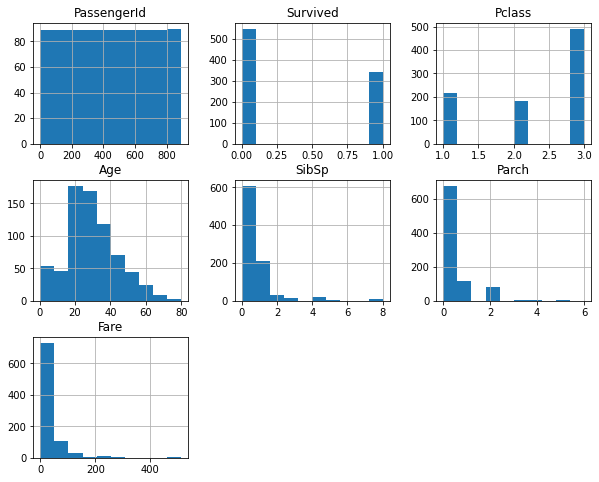

In [8]:
# Ver histograma das variaveis númericas

treino.hist(figsize=(10,8));

**4. Quais grupos de pessoas tinham mais chances de sobrevivência??**

Olhando esses dados podemos ver que o sexo que teve mais chance de sobreviver foi o sexo femenino

In [9]:
treino[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


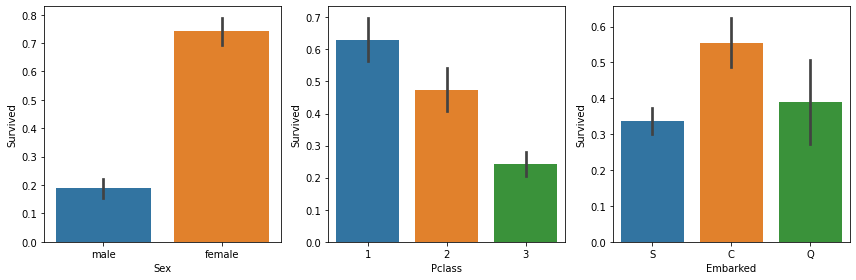

In [10]:
# Plotando gráfico para Survived ==>Sex, Pclass e Embarked

fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(12,4))

sns.barplot(x="Sex",y="Survived",data=treino,ax=ax1)

sns.barplot(x="Pclass",y="Survived",data=treino,ax=ax2)

sns.barplot(x="Embarked",y="Survived",data=treino,ax=ax3)

plt.tight_layout();

In [11]:
# ver influência da idade na probabilidade de sobrevivência

/home/kelvim/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kelvim/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


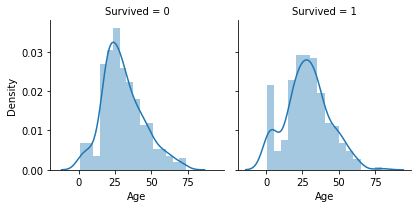

In [12]:
idade_sobreviver=sns.FacetGrid(treino,col="Survived");
idade_sobreviver.map(sns.distplot,"Age");

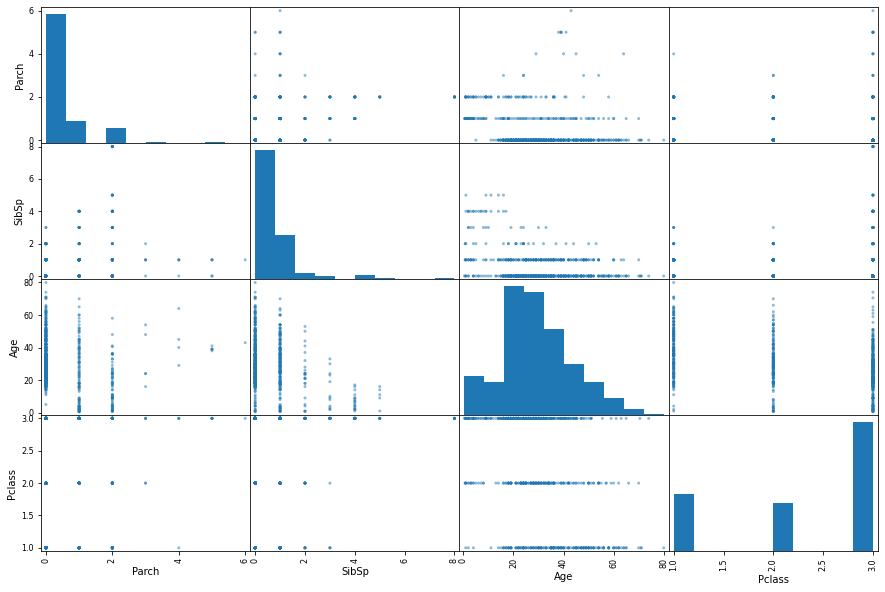

In [13]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']

#pd.plotting.scatter_matrix(treino[columns], figsize=(15, 10));
pd.plotting.scatter_matrix(treino[columns],figsize=(15,10));

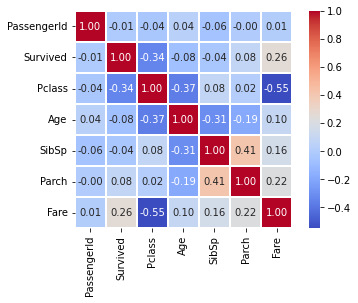

In [14]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(treino.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

Pouca gente sabe que o método df.describe() pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].

In [15]:
treino.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Olhando esses dados a gente observa que:**

Os valores para Name são únicos, um para cada pessoa;

Não há missing values para Name e Sex;

Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);

O Porto no qual embarcaram mais passageiros é o de S = Southampton.

## 4 Preparação dos Dados
Até o presente momento, tudo o que fizemos foi importar os dados para estruturas DataFrame, formular hipóteses, iniciar uma análise exploratória dos dados e visualizar graficos e correlações entre aquelas variáveis que julgamos pertinente.

Um projeto de data science não é amarrado e rigoroso, onde a gente segue um passo-a-passo linear, mas sim um processo iterativo, onde a gente vai e volta sempre que for necessário.

Quando a gente pega o notebook de alguém, fica sempre a impressão que está bem estruturado e que foi "direto ao ponto*. No entanto, antes de trazer uma versão bonitinha, eu vou e volto ao começo inúmeras vezes!



### Juntando os datasets de treino e teste

Uma dica para quando você vai preparar os dados para um modelo de Machine Learning é juntar os datasets de treino e teste em um único, e separar novamente no final.

Muitas vezes a gente vai fazer um feature engineering, criar variáveis dummy ou codificar as variáveis. Daí, nosso modelo vai ser treinado em cima dessa arquitetura, e os dados de teste vão ter que seguir essa mesma estrutura.

Por isso, é muito mais fácil fazer todas as etapas para um único DataFrame e dividir novamente entre treino e teste.

In [16]:
# salvar os índices dos datasets para recuperação posterior
train_idx = treino.shape[0]
test_idx = teste.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = teste['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = treino.Survived.copy()
treino.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[treino, teste], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


### Selecionar as features
Como qualquer conjunto de dados do mundo real, você vai se deparar sempre com dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Muitas vezes nosso julgamento pode ser equivocado, mas infelizmente é papel seu, como cientista de dados, escolher quais features serão usadas para o modelo de Machine Learning.

No nosso caso, vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não parecem relevantes.

In [17]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [18]:
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


**Resolvendo problema de valores Faltantes**

In [19]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [20]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

### Preparar as variáveis pro modelo
O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

Como você vê abaixo, eu convertir os valores possíveis de Sexpara {'male': 0, 'female': 1}. Já em relação à variável Embarked, apliquei o conceito de variáveis dummies.

As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. Para ficar mais fácil entender, veja como fica o DataFrame após todos esses tratamentos:

In [21]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


### Recuperando os datasets de treino e teste
Aqui a gente acabou de preparar o dataset para o modelo e vou dividir df_merged em train e test, exatamente como era no começo.

Agora você consegue entender a razão da concatenação lá em cima. Teríamos trabalho dobrado e ainda teria o risco de errarmos em alguma etapa.

In [22]:
# recuperar datasets de treino e teste
treino = df_merged.iloc[:train_idx]
teste = df_merged.iloc[train_idx:]

## 5 Construção do Modelo e Avaliação
A etapa mais demorada de qualquer projeto de Data Science é a Análise Exploratória de Dados e a preparação/tratamento deles.

Todo cuidado que tivemos serviu para entender o problema, testar hipóteses e descartar dados desnecessários/redundantes.

Com poucas linhas de código a gente consegue criar e otimizar modelos de Machine Learning básicos. Aqui, vamos construir dois:

Modelo de Regressão Logística

Modelo de Árvore de Decisão

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [24]:
#Criar modelo Regresão Logistica
modelo_RL=LogisticRegression(solver="liblinear")

In [25]:
modelo_RL.fit(treino,target)

LogisticRegression(solver='liblinear')

In [26]:
#acc_logReg = round(modelo_RL.score(treino, target) * 100, 2)
#print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

accu_RL=round(modelo_RL.score(treino,target)* 100,2)
print("Acuracia do modelo de Regressão Logistica é {}".format(accu_RL))

Acuracia do modelo de Regressão Logistica é 80.13


In [27]:
y_pred_RL=modelo_RL.predict(teste)

In [28]:
y_pred_RL[:5]

array([0, 0, 0, 0, 1])

In [29]:
submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_RL
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

In [30]:
# criar um modelo de árvore de decisão

modelo_DT=DecisionTreeClassifier(max_depth=3)

In [31]:
modelo_DT.fit(treino,target)

DecisionTreeClassifier(max_depth=3)

In [32]:
accu_DT=round(modelo_DT.score(treino,target)*100,2)

In [33]:
print("A acuracia do modelo de Arvore de Decisão é {}".format(accu_DT))

A acuracia do modelo de Arvore de Decisão é 82.72


In [34]:
y_pred_DT=modelo_DT.predict(teste)

In [35]:
print(y_pred_DT[:5])

[0 1 0 0 1]


# Eu sobreviveria ao Titanic?

Por fim chegamos no nosso objetivo principal, já que nosso modelo está pronto, vamos ver se eu e minha esposa sobreviveríamos ao naufrágio do Titanic.

Vou considerar que viajaríamos na 2ª Classe, eu com 35 anos e ela com 30, levando nosso bebê Kelvim, tendo pago o preço médio do Ticket e embarcados no porto de Southampton (Reino Unido).

In [36]:
# declarar os valores das variáveis para mim e minha esposa
Kelvim = np.array([2, 0, 35, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
Carla = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

In [37]:
print("Kelvim Calembe: {}".format(modelo_DT.predict(Kelvim)[0]))
print("Carla Calembe: {}".format(modelo_DT.predict(Carla)[0]))

Kelvim Calembe: 0
Carla Calembe: 1


# Conclusão

Que coisa mais incrivel do mundo, ser humano é foda yaa, com base os meus dados o computador conseguiu prever se eu sobreviveria ou não ao Titanic, estou super empolgado.

Imagina onde isso está nos levando, uma vez vî um arqtigo que dizia que algoritmo consegue prever quando uma pessoa irá morrer isso é incrivel ..

Infelizmente, de acordo com meu próprio modelo, eu não teria sobrevivido ao desastre do Titanic. Já minha esposa foi classificada como sobrevivente. Parece que a realidade retratada no filme de James Cameron traz algumas verdades.
